In [43]:
import numpy as np
import pandas as pd

In [44]:
# !wget https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/data/Seattle2014.csv

In [45]:
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall/254.0
inches.shape

(365,)

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

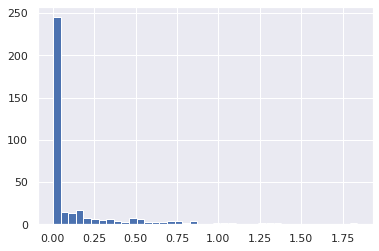

In [47]:
plt.hist(inches, 40);

#### Comparison operators as ufuncs

In [48]:
x = np.array([1,2,3,4,5])

In [49]:
x<3

array([ True,  True, False, False, False])

In [50]:
x>3

array([False, False, False,  True,  True])

In [51]:
x<=3

array([ True,  True,  True, False, False])

In [52]:
x>=3

array([False, False,  True,  True,  True])

In [53]:
x!=3

array([ True,  True, False,  True,  True])

In [54]:
x==3

array([False, False,  True, False, False])

In [55]:
(2*x)==(x**2)

array([False,  True, False, False, False])

In [56]:
rng = np.random.RandomState(0)
x=rng.randint(10, size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [57]:
x<6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

### Working with Boolean Arrays

In [58]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [60]:
np.count_nonzero(x<6)

8

In [61]:
np.sum(x<6)

8

In [62]:
np.sum(x<6, axis=1)

array([4, 2, 2])

In [63]:
np.any(x>8)

True

In [65]:
np.any(x<0)

False

In [66]:
np.all(x<10)

True

In [67]:
np.all(x==6)

False

In [68]:
np.all(x<8, axis = 1)

array([ True, False,  True])

### Boolean operators

In [69]:
np.sum((inches>0.5) & (inches<1))

29

In [71]:
print("Number of days without rain:", np.sum(inches==0))
print("Numner of days with rain:",np.sum(inches>0))
print("Days with more than 0.5 inches:", np.sum(inches>0.5))
print("rainy days with <0.2 inches", np.sum((inches>0)&(inches<0.2)))

Number of days without rain: 215
Numner of days with rain: 150
Days with more than 0.5 inches: 37
rainy days with <0.2 inches 75


### Boolean Arrays as Masks

In [72]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [73]:
x<5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [74]:
x[x<5]

array([0, 3, 3, 3, 2, 4])

In [85]:
# a mask for all rainy days
rainy = (inches>0)

# a mask for all summer days
days = np.arange(365)
summer = (days>172) & (days<262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315
